In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import requests
import geojson
import json
import numpy as np

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
Authorization


'5f2680b713bddbda2b2a03bf89fa4751'

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/56'
#AM PEAK IN BOUND----------------------------
params_April_AMPeak = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
}
params_geo_April_AMPeak  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
}
params_May_AMPeak = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_AMPeak  = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}
#OFFPEAK INBOUND------------------------
params_April_offpeak_in = {
    'direction': ('1'),
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
}
params_geo_April_offpeak_in = {
    'direction': ('1'),
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'resolution': 'hiRes',
}
#----------------------------------
params_April_offpeak_out = {
    'direction': ('0'),
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
}
params_geo_April_offpeak_out = {
    'direction': ('0'),
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'resolution': 'hiRes',
}
#--------------------------
params_May_offpeak_in = {
    'direction': ('1'),
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'excludeDates' : '05-30-2022',
}
params_geo_May_offpeak_in = {
    'direction': ('1'),
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',   
}
#----------------------------
params_May_offpeak_out = {
    'direction': ('0'),
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'excludeDates' : '05-30-2022',
}
params_geo_May_offpeak_out = {
    'direction': ('0'),
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}
#PM PEAK OUTBOUND--------------------
params_April_PMPeak = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '14:30',
    'endTime' : '18:00',
}
params_geo_April_PMPeak  = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'resolution': 'hiRes',
}
params_May_PMPeak = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_APMPeak  = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',    
}
# EVENING INBOUND------------------------
params_April_Evening_In = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
}
params_geo_April_Evening_In  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'resolution': 'hiRes',
}
params_May_Evening_In = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates' : '05-30-2022',
}
params_geo_May_Evening_In  = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}

#EVENING OUTBOUND
params_April_Evening_out = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
}
params_geo_April_Evening_out  = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'resolution': 'hiRes',
}
params_May_Evening_out = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates' : '05-30-2022',
}
params_geo_May_Evening_out  = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}
# EARLY AM INBOUND-------------------
params_April_EarlyAM_In = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
}
params_geo_April_EarlyAM_In  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',
}
params_May_EarlyAM_In = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_EarlyAM_In  = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}

#EARLY AM OUTBOUND
params_April_EarlyAM_out = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
}
params_geo_April_EarlyAM_out  = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',
}
params_May_EarlyAM_out = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_EarlyAM_out  = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}
headers = {'Authorization': Authorization,
         'Content-Type': 'application/json'}

In [6]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    return full_df


trial = concat_frames_columns(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '01/25/22-02/24/22')

# AM PEAK INBOUND

In [7]:
r56_ampeak_apr=concat_frames_columns(requests.get(URL, params = params_geo_April_AMPeak, headers = headers), 
                              requests.get(URL, params = params_April_AMPeak, headers = headers), '03/25/22-04/24/22',
                              '06:00-09:00','m_f','Inbound')


In [8]:
seg_filter_r56_ampeak_apr=r56_ampeak_apr[r56_ampeak_apr['countForSegment'] > r56_ampeak_apr['countForSegment'].max()/2]


In [9]:
clean_geo_r56_ampeak_apr=seg_filter_r56_ampeak_apr[seg_filter_r56_ampeak_apr['percent20Secs']>=np.percentile(seg_filter_r56_ampeak_apr['percent20Secs'], 80)]


In [10]:
clean_geo_r56_ampeak_apr.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
365,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,73.004303,0.327077,547.338,113.843,...,43.544,24.926,2.401,211,34.658,03/25/22-04/24/22,06:00-09:00,m_f,Inbound,389
319,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.806,95.697744,0.248762,400.669,217.129,...,32.958,6.877,1.581,363,20.486,03/25/22-04/24/22,06:00-09:00,m_f,Inbound,389
379,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,20.117310,1.186938,275.631,26.980,...,15.876,6.777,2.401,216,14.494,03/25/22-04/24/22,06:00-09:00,m_f,Inbound,389
456,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.066226,1.978912,275.631,16.967,...,8.215,5.121,2.401,221,6.730,03/25/22-04/24/22,06:00-09:00,m_f,Inbound,389
697,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,8.752030,2.728281,275.631,10.709,...,5.506,4.257,2.401,232,4.974,03/25/22-04/24/22,06:00-09:00,m_f,Inbound,389


In [11]:
clean_geo_r56_ampeak_apr.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,24.176741,6.459974,6.045030,73.975027,12.798762,8.462027,6.384122,4.141616,3.007163,2.150646,1.348680,348.326531,2.598483,389.0
std,0.408980,10.089124,2.679352,100.311706,22.446156,16.978202,13.277955,7.616266,4.424472,2.035205,0.368019,48.265130,3.285070,0.0
min,23.544000,2.270662,0.248762,6.098000,2.549000,2.333000,2.175000,2.014500,1.841000,1.574000,0.361000,198.000000,1.777000,389.0
25%,23.878000,2.938306,3.733728,16.862500,4.400500,3.422000,2.929000,2.418250,2.015500,1.707500,1.220000,363.000000,1.872000,389.0
50%,24.039000,3.705620,6.546896,42.110000,5.900000,4.203000,3.508000,2.674000,2.203000,1.787000,1.308000,367.000000,1.981000,389.0
75%,24.565000,6.456129,8.299259,70.638000,11.331000,7.053500,5.276500,3.366000,2.503500,1.952000,1.403000,371.000000,2.191000,389.0
max,24.856000,95.697744,10.456422,547.338000,217.129000,175.459000,136.685000,68.802000,43.544000,24.926000,2.537000,387.000000,34.658000,389.0


<AxesSubplot:>

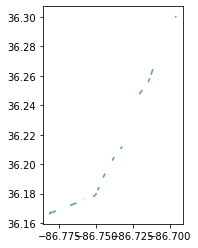

In [12]:
clean_geo_r56_ampeak_apr.plot()

# AM PEAK MAY INBOUND

In [13]:
r56_ampeak_may=concat_frames_columns(requests.get(URL, params = params_geo_May_AMPeak, headers = headers), 
                              requests.get(URL, params = params_May_AMPeak, headers = headers), '04/25/22-05/24/22',
                              '06:00-09:00','m_f','Inbound')


In [14]:
seg_filter_r56_ampeak_may=r56_ampeak_may[r56_ampeak_may['countForSegment'] > r56_ampeak_may['countForSegment'].max()/2]


In [15]:
clean_geo_r56_ampeak_may=seg_filter_r56_ampeak_may[seg_filter_r56_ampeak_may['percent20Secs']>=np.percentile(seg_filter_r56_ampeak_may['percent20Secs'], 80)]


In [16]:
clean_geo_r56_ampeak_may.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
188,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,95.996251,0.248739,884.494,193.426,...,47.039,15.898,2.076,327,35.279,04/25/22-05/24/22,06:00-09:00,m_f,Inbound,411
425,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,103.527148,0.230809,522.791,256.225,...,32.889,7.700,1.300,372,17.498,04/25/22-05/24/22,06:00-09:00,m_f,Inbound,411
198,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,22.716456,1.051132,558.935,31.861,...,15.739,5.877,2.076,338,13.231,04/25/22-05/24/22,06:00-09:00,m_f,Inbound,411
242,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,11.819828,2.020165,118.060,17.652,...,8.682,3.955,2.076,344,7.041,04/25/22-05/24/22,06:00-09:00,m_f,Inbound,411
398,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,7.933615,3.009725,118.060,12.896,...,5.355,3.785,2.006,358,4.840,04/25/22-05/24/22,06:00-09:00,m_f,Inbound,411


In [17]:
clean_geo_r56_ampeak_may.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,147.00000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,24.15634,6.661614,6.094094,77.904048,13.996381,8.829197,6.507218,4.220850,3.018980,2.069374,1.334503,387.040816,2.564048,411.0
std,0.40156,11.694665,2.764265,120.654804,27.941108,18.749810,14.244624,8.367636,4.655232,1.350375,0.215813,11.004282,3.199448,0.0
min,23.54400,2.048479,0.230809,5.215000,2.474000,2.312000,2.151000,1.983000,1.826000,1.513000,0.904000,327.000000,1.750000,411.0
25%,23.87800,2.996587,3.770275,18.339000,4.460000,3.485000,2.940000,2.318250,1.955500,1.679000,1.233000,386.000000,1.827000,411.0
50%,23.97100,3.738123,6.401892,43.285000,6.313000,4.249000,3.448000,2.642500,2.144000,1.777000,1.324000,389.000000,1.958000,411.0
75%,24.56500,6.354893,8.140716,77.638500,11.997000,7.146000,5.281500,3.359750,2.530000,1.981000,1.416000,391.000000,2.217500,411.0
max,24.85600,103.527148,11.657430,884.494000,256.225000,186.674000,140.820000,80.333000,47.039000,15.898000,2.076000,411.000000,35.279000,411.0


<AxesSubplot:>

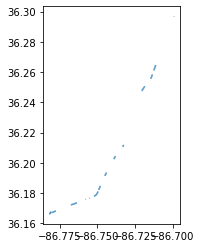

In [18]:
clean_geo_r56_ampeak_may.plot()

# APRIL OFF PEAK INBOUND

In [19]:
r56_offpeak_apr_in=concat_frames_columns(requests.get(URL, params = params_geo_April_offpeak_in, headers = headers), 
                              requests.get(URL, params = params_April_offpeak_in, headers = headers), '03/25/22-04/24/22',
                              '09:00-14:30','m_f','Inbound')


In [20]:
seg_filter_r56_offpeak_apr_in=r56_offpeak_apr_in[r56_offpeak_apr_in['countForSegment'] > r56_offpeak_apr_in['countForSegment'].max()/2]


In [21]:
clean_geo_r56_offpeak_apr_in=seg_filter_r56_offpeak_apr_in[seg_filter_r56_offpeak_apr_in['percent20Secs']>=np.percentile(seg_filter_r56_offpeak_apr_in['percent20Secs'], 80)]


In [22]:
clean_geo_r56_offpeak_apr_in.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
365,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,114.339672,0.208834,960.699,212.433,...,63.593,30.762,2.716,384,44.418,03/25/22-04/24/22,09:00-14:30,m_f,Inbound,702
319,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.806,102.491125,0.232274,463.799,228.592,...,34.152,6.849,1.650,689,17.869,03/25/22-04/24/22,09:00-14:30,m_f,Inbound,702
379,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,28.828222,0.828286,383.453,39.343,...,17.011,10.843,2.595,396,14.884,03/25/22-04/24/22,09:00-14:30,m_f,Inbound,702
456,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,13.487496,1.770381,185.238,18.505,...,9.721,5.472,2.595,399,7.487,03/25/22-04/24/22,09:00-14:30,m_f,Inbound,702
431,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,7.892498,3.025405,166.397,10.017,...,5.896,4.483,2.595,414,5.358,03/25/22-04/24/22,09:00-14:30,m_f,Inbound,702


In [23]:
clean_geo_r56_offpeak_apr_in.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,24.193048,7.607923,5.614163,102.076503,15.747925,10.397701,7.672075,4.856735,3.353633,2.313027,1.389782,656.789116,2.781102,702.0
std,0.399659,13.090871,2.704836,135.279620,28.888864,20.857989,16.253921,9.704876,5.847635,2.567154,0.385164,82.709363,3.901178,0.0
min,23.544000,2.280145,0.208834,5.219000,2.603000,2.425000,2.312000,2.132000,1.944000,1.541000,0.658000,384.000000,1.851000,702.0
25%,23.878000,3.104978,3.499894,28.859500,4.545000,3.623500,3.116000,2.507500,2.106000,1.749500,1.235000,685.000000,1.931000,702.0
50%,24.039000,4.096093,5.823395,51.803000,6.901000,4.604000,3.803000,2.921000,2.307000,1.888000,1.365000,690.000000,2.125000,702.0
75%,24.625000,6.927681,7.719402,96.986000,13.519500,8.179500,5.851500,3.813750,2.681500,2.054000,1.459500,692.000000,2.344000,702.0
max,24.913000,114.339672,10.473018,960.699000,228.592000,184.777000,153.503000,89.596500,63.593000,30.762000,2.716000,698.000000,44.418000,702.0


<AxesSubplot:>

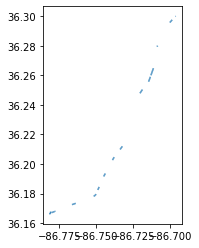

In [24]:
clean_geo_r56_offpeak_apr_in.plot()

# APRIL OFFPEAK OUTBOUND

In [25]:
r56_offpeak_apr_out=concat_frames_columns(requests.get(URL, params = params_geo_April_offpeak_out, headers = headers), 
                              requests.get(URL, params = params_April_offpeak_out, headers = headers), '03/25/22-04/24/22',
                              '14:30-18:00','m_f','Outbound')


In [26]:
seg_filter_r56_offpeak_apr_out=r56_offpeak_apr_out[r56_offpeak_apr_out['countForSegment'] > r56_offpeak_apr_out['countForSegment'].max()/2]


In [27]:
clean_geo_r56_offpeak_apr_out=seg_filter_r56_offpeak_apr_out[seg_filter_r56_offpeak_apr_out['percent20Secs']>=np.percentile(seg_filter_r56_offpeak_apr_out['percent20Secs'], 80)]


In [28]:
clean_geo_r56_offpeak_apr_out.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
420,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,417.654520,0.059001,1230.381,740.175,...,274.173,11.213,2.350,523,129.651,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,701
385,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,76.416139,0.320364,1074.067,153.287,...,24.188,10.020,0.396,676,17.402,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,701
289,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,60.881786,0.403635,572.755,163.127,...,14.729,3.879,1.550,676,8.529,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,701
345,"LINESTRING (-86.68661 36.30757, -86.68667 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,13.955668,1.754198,483.408,21.615,...,7.068,5.901,0.396,678,6.410,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,701
375,"LINESTRING (-86.68616 36.30781, -86.68639 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,12.093066,2.024383,487.639,12.386,...,6.337,5.362,0.396,678,5.877,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,701


In [29]:
clean_geo_r56_offpeak_apr_out.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,24.430893,9.533368,5.458297,114.599292,19.655631,13.145006,9.968673,6.648259,4.539952,2.213821,1.200411,662.809524,3.292571,701.0
std,0.512928,33.422147,2.478602,174.672730,64.725891,51.578112,45.261076,34.656646,21.033506,1.127248,0.410182,48.113881,9.915084,0.0
min,22.819000,2.327597,0.059001,5.320000,2.754000,2.470000,2.322000,2.144000,1.995000,1.541000,0.319000,474.000000,1.897000,701.0
25%,24.181000,3.348135,3.681763,37.377750,5.122750,3.844000,3.220000,2.564125,2.156000,1.785750,1.132000,668.000000,1.976250,701.0
50%,24.574000,4.268813,5.732705,67.491000,7.274000,5.112000,4.113500,2.980250,2.352500,1.887000,1.355000,677.000000,2.109500,701.0
75%,24.848000,6.622137,7.282045,111.858250,12.394000,7.339250,5.794750,3.805250,2.925250,2.222000,1.449500,681.000000,2.586500,701.0
max,24.984000,417.654520,10.733387,1230.381000,740.175000,630.187000,579.166000,450.743000,274.173000,11.213000,2.350000,692.000000,129.651000,701.0


<AxesSubplot:>

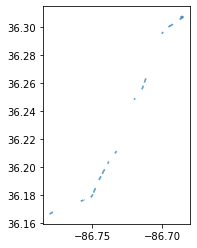

In [30]:
clean_geo_r56_offpeak_apr_out.plot()

# MAY OFFPEAK INBOUND

In [31]:
r56_offpeak_may_in=concat_frames_columns(requests.get(URL, params = params_geo_May_offpeak_in, headers = headers), 
                              requests.get(URL, params = params_May_offpeak_in, headers = headers), '04/25/22-05/24/22',
                              '14:30-18:00','m_f','Inbound')
r56_offpeak_may_in.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
0,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.242274,10.680675,25.950,3.160,...,1.801,1.596,1.279,708,1.702,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.029295,7.882362,34.424,4.329,...,2.198,1.758,0.742,698,2.025,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722


In [32]:
seg_filter_r56_offpeak_may_in=r56_offpeak_may_in[r56_offpeak_may_in['countForSegment'] > r56_offpeak_may_in['countForSegment'].max()/2]
seg_filter_r56_offpeak_may_in.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
0,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.242274,10.680675,25.950,3.160,...,1.801,1.596,1.279,708,1.702,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.029295,7.882362,34.424,4.329,...,2.198,1.758,0.742,698,2.025,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722


In [33]:
clean_geo_r56_offpeak_may_in=seg_filter_r56_offpeak_may_in[seg_filter_r56_offpeak_may_in['percent20Secs']>=np.percentile(seg_filter_r56_offpeak_may_in['percent20Secs'], 80)]
clean_geo_r56_offpeak_may_in.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.029295,7.882362,34.424,4.329,...,2.198,1.758,0.742,698,2.025,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
12,"LINESTRING (-86.74382 36.19376, -86.74392 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,3.884693,6.170629,52.662,6.201,...,2.014,1.667,0.987,706,1.856,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722


In [34]:
clean_geo_r56_offpeak_may_in.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
188,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,109.074140,0.218915,1049.088,225.395,...,49.849,24.314,2.233,537,36.607,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
425,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,111.024653,0.215222,425.957,246.072,...,42.453,10.196,1.736,677,26.016,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
198,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,28.519668,0.837247,345.119,49.305,...,16.476,8.234,2.233,579,14.319,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
242,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,14.559207,1.640062,265.708,20.124,...,9.145,5.136,2.233,585,7.466,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722
398,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,9.907272,2.410149,383.217,16.654,...,5.833,4.308,1.593,614,5.267,04/25/22-05/24/22,14:30-18:00,m_f,Inbound,722


In [35]:
clean_geo_r56_offpeak_may_in.describe()


,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.0
mean,24.163966,7.588351,5.740112,94.778824,16.109770,10.231345,7.668047,4.887740,3.294203,2.255966,1.320953,699.932432,2.771649,722.0
std,0.382561,13.244229,2.786780,130.826675,30.533443,20.683558,16.167967,9.807393,5.271100,2.081250,0.288544,26.098365,3.625506,0.0
min,23.544000,2.160607,0.215222,5.861000,2.584000,2.373000,2.282000,2.120000,1.950000,1.531000,0.436000,537.000000,1.842000,722.0
25%,23.878000,3.035534,3.472547,22.666000,4.387750,3.629000,3.118750,2.485750,2.105000,1.742250,1.149750,698.000000,1.917500,722.0
50%,24.033500,4.144902,5.833663,53.329000,6.344000,4.665000,3.788500,2.884750,2.326000,1.858500,1.343000,709.000000,2.091500,722.0
75%,24.565000,7.014738,7.987506,92.343750,13.197250,8.034750,5.944250,3.707500,2.703250,2.040250,1.449000,713.000000,2.375750,722.0
max,24.913000,111.024653,11.052450,1049.088000,246.072000,193.694000,156.311000,85.622000,49.849000,24.314000,2.250000,721.000000,36.607000,722.0


<AxesSubplot:>

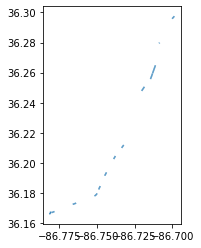

In [36]:
clean_geo_r56_offpeak_may_in.plot()

MAY OFFPEAK OUTBOUND

In [37]:
r56_offpeak_may_out=concat_frames_columns(requests.get(URL, params = params_geo_May_offpeak_out, headers = headers), 
                              requests.get(URL, params = params_May_offpeak_out, headers = headers), '04/25/22-05/24/22',
                              '14:30-18:00','m_f','Outbound')


In [38]:
seg_filter_r56_offpeak_may_out=r56_offpeak_may_out[r56_offpeak_may_out['countForSegment'] > r56_offpeak_may_out['countForSegment'].max()/2]


In [39]:
clean_geo_r56_offpeak_may_out=seg_filter_r56_offpeak_may_out[seg_filter_r56_offpeak_may_out['percent20Secs']>=np.percentile(seg_filter_r56_offpeak_may_out['percent20Secs'], 80)]


In [40]:
clean_geo_r56_offpeak_may_out.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
419,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,412.790489,0.059696,1465.467,777.334,...,232.614,8.824,2.502,538,29.981,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,722
384,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,100.580421,0.243397,1063.067,223.600,...,22.115,8.803,0.635,703,16.834,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,722
288,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,50.863566,0.483136,504.899,143.640,...,13.186,3.079,1.662,707,7.497,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,722
345,"LINESTRING (-86.68661 36.30757, -86.68667 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,13.059133,1.874627,648.239,20.343,...,6.967,5.716,0.635,705,6.257,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,722
374,"LINESTRING (-86.68616 36.30781, -86.68639 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,8.352079,2.931126,53.195,11.165,...,6.354,5.324,0.635,705,5.865,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,722


In [41]:
clean_geo_r56_offpeak_may_out.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,24.451804,9.609299,5.434014,119.843863,20.037036,12.876988,9.589012,6.551619,4.267720,2.191220,1.223589,701.559524,2.692286,722.0
std,0.513946,33.181990,2.523375,194.853329,66.604679,51.836043,44.745861,33.458070,17.828735,0.953381,0.320598,17.126407,2.538522,0.0
min,22.819000,2.254369,0.059696,5.910000,2.790000,2.509000,2.336000,2.135000,1.996000,1.509000,0.513000,538.000000,1.892000,722.0
25%,24.181000,3.291883,3.564932,24.159750,5.227500,3.952000,3.308000,2.572125,2.151250,1.786500,1.092000,699.750000,1.980750,722.0
50%,24.574000,4.560942,5.345640,56.710500,7.216500,5.071500,4.074500,3.014000,2.363000,1.894000,1.338000,705.000000,2.126500,722.0
75%,24.853000,6.849625,7.486169,111.402500,13.307500,7.664000,5.608750,3.906000,2.897750,2.167500,1.405000,710.000000,2.541500,722.0
max,24.984000,412.790489,11.082037,1465.467000,777.334000,648.258000,578.601000,435.164500,232.614000,8.824000,2.502000,714.000000,29.981000,722.0


<AxesSubplot:>

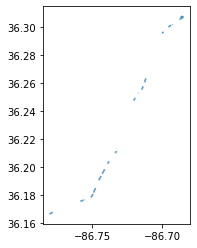

In [42]:
clean_geo_r56_offpeak_may_out.plot()

<AxesSubplot:>

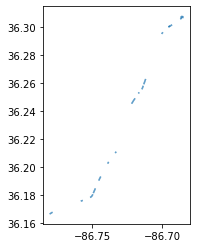

In [43]:
r56_pmpeak=concat_frames_columns(requests.get(URL, params = params_geo_April_PMPeak, headers = headers), 
                              requests.get(URL, params = params_April_PMPeak, headers = headers), '03/25/22-04/24/22',
                              '14:30-18:00','m_f','Inbound')
r56_pmpeak.head(2)

seg_filter_r56_pmpeak=r56_pmpeak[r56_pmpeak['countForSegment'] > r56_pmpeak['countForSegment'].max()/2]
seg_filter_r56_pmpeak.head(2)

clean_geo_r56_pmpeak=seg_filter_r56_pmpeak[seg_filter_r56_pmpeak['percent20Secs']>=np.percentile(seg_filter_r56_pmpeak['percent20Secs'], 80)]
clean_geo_r56_pmpeak.head(2)

clean_geo_r56_pmpeak.sort_values(by=('percent20Secs'), ascending=False).head()

clean_geo_r56_pmpeak.describe()

clean_geo_r56_pmpeak.plot()

# APRIL PM PEAK OUBOUND

In [44]:
r56_pmpeak=concat_frames_columns(requests.get(URL, params = params_geo_April_PMPeak, headers = headers), 
                              requests.get(URL, params = params_April_PMPeak, headers = headers), '03/25/22-04/24/22',
                              '14:30-18:00','m_f','Outbound')
                         

In [45]:
seg_filter_r56_pmpeak=r56_pmpeak[r56_pmpeak['countForSegment'] > r56_pmpeak['countForSegment'].max()/2]


In [46]:
clean_geo_r56_pmpeak=seg_filter_r56_pmpeak[seg_filter_r56_pmpeak['percent20Secs']>=np.percentile(seg_filter_r56_pmpeak['percent20Secs'], 80)]


In [47]:
clean_geo_r56_pmpeak.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
385,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,49.420050,0.495366,505.975,92.650,...,21.482,7.921,0.329,417,14.993,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,444
289,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,36.781823,0.668102,291.474,86.288,...,13.476,4.723,1.666,430,8.185,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,444
458,"LINESTRING (-86.71237 36.26162, -86.71230 36.2...",GALMAPNF,Gallatin Pike & Maple St Nb,GALOLDNM,Gallatin Pike & Old Hickory Nb,24.282,20.817492,1.166423,85.709,46.674,...,9.638,5.574,1.503,427,7.329,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,444
661,"LINESTRING (-86.71245 36.26140, -86.71237 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,23.758418,1.034328,243.571,50.059,...,10.117,4.918,1.521,426,7.050,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,444
420,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,221.206989,0.111398,1201.039,598.173,...,12.351,3.784,2.111,282,6.738,03/25/22-04/24/22,14:30-18:00,m_f,Outbound,444


In [48]:
clean_geo_r56_pmpeak.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0
mean,24.415485,9.325826,4.178572,99.395219,20.439053,12.598775,9.499876,5.644737,3.547941,2.417923,1.237988,419.976331,2.967817,444.0
std,0.546327,17.589977,1.933362,131.256826,47.770814,34.829802,26.554814,10.043716,2.196537,0.810910,0.426942,26.701603,1.405367,0.0
min,22.819000,2.836293,0.111398,6.721000,3.695000,3.353000,3.104000,2.683500,2.309000,1.794000,0.239000,282.000000,2.153000,444.0
25%,24.181000,4.364937,2.467579,39.443000,6.795000,5.021000,4.169000,3.156000,2.541000,2.011000,0.963000,421.000000,2.275000,444.0
50%,24.574000,5.653855,4.304677,62.733000,10.123000,6.586000,5.058000,3.704000,2.851000,2.160000,1.404000,427.000000,2.526000,444.0
75%,24.853000,10.105451,5.581938,103.989000,20.222000,10.018000,7.484000,4.903000,3.450000,2.446000,1.521000,433.000000,2.987000,444.0
max,24.984000,221.206989,8.525565,1201.039000,598.173000,443.801000,340.095000,126.062500,21.482000,7.921000,2.111000,437.000000,14.993000,444.0


<AxesSubplot:>

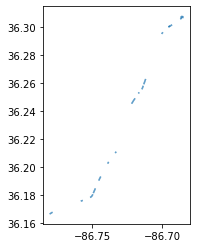

In [49]:
clean_geo_r56_pmpeak.plot()

# MAY PM PEAK OUTBOUND

In [50]:
r56_pmpeak_may=concat_frames_columns(requests.get(URL, params = params_geo_May_APMPeak, headers = headers), 
                              requests.get(URL, params = params_May_PMPeak, headers = headers), '04/25/22-05/24/22',
                              '14:30-18:00','m_f','Outbound')


In [51]:
seg_filter_r56_pmpeak_may=r56_pmpeak_may[r56_pmpeak_may['countForSegment'] > r56_pmpeak_may['countForSegment'].max()/2]


In [52]:
clean_geo_r56_pmpeak_may=seg_filter_r56_pmpeak_may[seg_filter_r56_pmpeak_may['percent20Secs']>=np.percentile(seg_filter_r56_pmpeak_may['percent20Secs'], 80)]


In [53]:
clean_geo_r56_pmpeak_may.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
384,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,53.953844,0.453740,1036.192,100.078,...,22.684,10.814,2.565,423,16.951,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,474
457,"LINESTRING (-86.71237 36.26162, -86.71230 36.2...",GALMAPNF,Gallatin Pike & Maple St Nb,GALOLDNM,Gallatin Pike & Old Hickory Nb,24.282,22.273069,1.090196,129.584,49.828,...,10.090,5.737,2.047,436,7.844,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,474
649,"LINESTRING (-86.71245 36.26140, -86.71237 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,26.586236,0.924313,206.527,55.690,...,10.955,5.394,2.072,436,7.803,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,474
288,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,37.939133,0.647722,306.111,94.981,...,11.557,3.693,1.548,445,7.388,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,474
344,"LINESTRING (-86.68661 36.30757, -86.68667 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,12.044521,2.032542,182.292,20.188,...,7.054,5.938,2.565,426,6.468,04/25/22-05/24/22,14:30-18:00,m_f,Outbound,474


In [54]:
clean_geo_r56_pmpeak_may.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,24.43625,9.327975,4.341932,96.476381,20.638595,12.796542,9.663899,5.644801,3.493345,2.381161,1.430589,441.845238,2.917452,474.0
std,0.55233,18.869676,2.083045,131.336773,47.044485,38.713521,30.370898,11.197391,2.274767,0.967333,0.404822,17.376076,1.522429,0.0
min,22.81900,2.660794,0.104137,8.047000,3.535000,3.092000,2.842000,2.518000,2.236000,1.531000,0.469000,311.000000,2.095000,474.0
25%,24.28200,4.109855,2.603129,36.317750,6.243750,4.871000,4.038750,3.037500,2.474000,1.960000,1.319000,434.000000,2.218000,474.0
50%,24.57400,5.666917,4.234068,65.182500,9.936000,6.338000,4.997000,3.669750,2.837500,2.110000,1.454500,447.000000,2.452000,474.0
75%,24.85300,9.563070,5.932982,107.588250,18.504500,9.936000,7.511000,4.635875,3.418000,2.440250,1.587000,450.000000,2.928750,474.0
max,24.98400,236.630244,9.125847,1066.112000,577.414000,493.712000,390.412000,141.419000,22.684000,10.814000,2.604000,474.000000,16.951000,474.0


<AxesSubplot:>

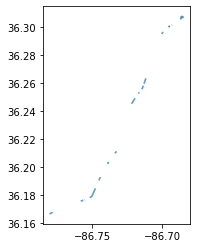

In [55]:
clean_geo_r56_pmpeak_may.plot()

# APRIL EVENING INBOUND

In [56]:
r56_evening_apr=concat_frames_columns(requests.get(URL, params = params_geo_April_Evening_In, headers = headers), 
                              requests.get(URL, params = params_April_Evening_In, headers = headers), '03/25/22-04/24/22',
                              '18:00-23:59','m_f','Inbound')


In [57]:
seg_filter_r56_evening_apr=r56_evening_apr[r56_evening_apr['countForSegment'] > r56_evening_apr['countForSegment'].max()/2]


In [58]:
clean_geo_r56_evening_apr=seg_filter_r56_evening_apr[seg_filter_r56_evening_apr['percent20Secs']>=np.percentile(seg_filter_r56_evening_apr['percent20Secs'], 80)]


In [59]:
clean_geo_r56_evening_apr.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
365,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,60.288763,0.396061,606.267,92.682,...,30.339,12.046,2.401,224,25.633,03/25/22-04/24/22,18:00-23:59,m_f,Inbound,375
379,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,22.696248,1.052068,419.719,26.292,...,15.028,7.067,2.401,234,12.919,03/25/22-04/24/22,18:00-23:59,m_f,Inbound,375
456,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.131694,1.968233,316.747,16.860,...,7.952,4.790,2.401,235,6.288,03/25/22-04/24/22,18:00-23:59,m_f,Inbound,375
319,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.806,71.091798,0.334863,402.900,196.689,...,10.911,2.334,1.119,351,5.522,03/25/22-04/24/22,18:00-23:59,m_f,Inbound,375
431,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,6.895176,3.463001,136.954,8.659,...,5.113,3.865,2.401,239,4.720,03/25/22-04/24/22,18:00-23:59,m_f,Inbound,375


In [60]:
clean_geo_r56_evening_apr.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0
mean,24.211384,6.196439,6.281940,71.886404,12.921479,8.600534,6.177274,3.778928,2.702370,1.949781,1.193760,344.561644,2.368103,375.0
std,0.408089,8.293899,2.886753,95.922872,21.011081,14.780162,9.746063,4.457750,2.750275,1.079345,0.310683,38.668346,2.253730,0.0
min,23.437000,2.149068,0.334863,5.989000,2.624000,2.397000,2.241000,2.055000,1.855000,1.496000,0.904000,207.000000,1.750000,375.0
25%,23.878000,2.802434,4.228436,13.968500,4.143250,3.207500,2.850000,2.297500,1.979250,1.640250,1.058000,347.000000,1.815250,375.0
50%,24.097000,3.741284,6.404210,35.171000,6.397500,4.540000,3.578000,2.648500,2.097000,1.695500,1.109000,352.000000,1.901000,375.0
75%,24.651000,5.639176,8.697477,91.001000,11.122500,7.376000,5.450500,3.374250,2.406000,1.788000,1.160250,369.000000,2.100500,375.0
max,24.913000,71.091798,11.223576,606.267000,196.689000,151.420000,95.963000,39.054000,30.339000,12.046000,2.401000,374.000000,25.633000,375.0


<AxesSubplot:>

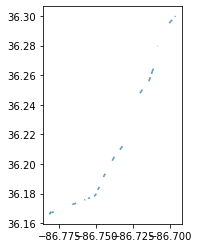

In [61]:
clean_geo_r56_evening_apr.plot()

# MAY EVEING INBOUND

In [62]:
r56_evening_may=concat_frames_columns(requests.get(URL, params = params_geo_May_Evening_In, headers = headers), 
                              requests.get(URL, params = params_May_Evening_In, headers = headers), '04/25/22-05/24/22',
                              '18:00-23:59','m_f','Inbound')


In [63]:
seg_filter_r56_evening_may=r56_evening_may[r56_evening_may['countForSegment'] > r56_evening_may['countForSegment'].max()/2]


In [64]:
clean_geo_r56_evening_may=seg_filter_r56_evening_may[seg_filter_r56_evening_may['percent20Secs']>=np.percentile(seg_filter_r56_evening_may['percent20Secs'], 80)]


In [65]:
clean_geo_r56_evening_may.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
188,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,63.869135,0.373858,535.122,109.421,...,30.837,11.480,2.277,289,25.842,04/25/22-05/24/22,18:00-23:59,m_f,Inbound,390
198,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,28.731100,0.831085,1039.952,28.231,...,15.138,6.525,2.277,310,12.336,04/25/22-05/24/22,18:00-23:59,m_f,Inbound,390
242,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.333532,1.936023,140.794,18.215,...,8.375,4.825,2.277,314,6.829,04/25/22-05/24/22,18:00-23:59,m_f,Inbound,390
425,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,69.242237,0.345093,290.931,183.352,...,13.510,2.517,1.029,346,5.787,04/25/22-05/24/22,18:00-23:59,m_f,Inbound,390
227,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,9.144311,2.611241,319.197,9.932,...,5.593,3.969,2.277,318,4.986,04/25/22-05/24/22,18:00-23:59,m_f,Inbound,390


In [66]:
clean_geo_r56_evening_may.describe()


,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0
mean,24.175377,6.357229,6.214231,79.418925,12.941705,8.454377,6.161000,3.815551,2.719582,1.933370,1.198507,366.794521,2.353842,390.0
std,0.388878,8.533129,2.877390,121.714249,20.753353,13.663607,9.875632,4.677007,2.867795,1.027277,0.340989,23.309290,2.265469,0.0
min,23.544000,2.114877,0.345093,4.713000,2.658000,2.355000,2.207000,2.022000,1.802000,1.518000,0.542000,204.000000,1.706000,390.0
25%,23.878000,2.807307,4.372053,17.680750,4.165000,3.280500,2.876000,2.300125,1.941500,1.615250,1.097000,357.000000,1.788500,390.0
50%,24.039000,3.753737,6.390274,44.038000,6.157500,4.538500,3.661500,2.623750,2.092500,1.686000,1.146000,372.000000,1.892000,390.0
75%,24.565000,5.661872,8.656117,90.287750,10.479500,7.276750,5.583750,3.366500,2.420500,1.780750,1.243000,383.000000,2.061000,390.0
max,24.856000,69.242237,11.291437,1039.952000,183.352000,131.987000,100.305000,41.110000,30.837000,11.480000,2.510000,388.000000,25.842000,390.0


<AxesSubplot:>

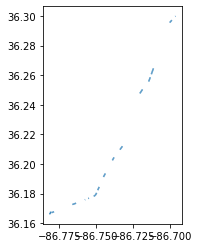

In [67]:
clean_geo_r56_evening_may.plot()

# APRIL EVENING OUTBOUND

In [68]:
params_April_Evening_out = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
}
params_geo_April_Evening_out  = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'resolution': 'hiRes',
}


In [69]:
r56_evening_apr_out=concat_frames_columns(requests.get(URL, params = params_geo_April_Evening_out, headers = headers), 
                              requests.get(URL, params = params_April_Evening_out, headers = headers), '03/25/22-04/24/22',
                              '14:30-18:00','m_f','Inbound')
r56_evening_apr_out.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.912487,8.374286,35.059,5.579,...,1.423,1.264,0.841,464,1.348,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.775117,13.988374,5.434,2.205,...,1.557,1.384,0.981,429,1.487,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491


In [70]:
seg_filter_r56_evening_apr_out=r56_evening_apr_out[r56_evening_apr_out['countForSegment'] > r56_evening_apr_out['countForSegment'].max()/2]
seg_filter_r56_evening_apr_out.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.912487,8.374286,35.059,5.579,...,1.423,1.264,0.841,464,1.348,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.775117,13.988374,5.434,2.205,...,1.557,1.384,0.981,429,1.487,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491


In [71]:
clean_geo_r56_evening_apr_out=seg_filter_r56_evening_apr_out[seg_filter_r56_evening_apr_out['percent20Secs']>=np.percentile(seg_filter_r56_evening_apr_out['percent20Secs'], 80)]
clean_geo_r56_evening_apr_out.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.745988,9.004409,15.032,4.442,...,1.976,1.667,1.068,405,1.854,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
15,"LINESTRING (-86.76483 36.17299, -86.76458 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.580728,9.581017,9.334,3.613,...,2.029,1.710,1.068,405,1.897,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491


In [72]:
clean_geo_r56_evening_apr_out.sort_values(by=('percent20Secs'), ascending=False).head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count
385,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,52.059729,0.470248,593.618,106.495,...,15.861,5.036,0.300,487,7.503,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
289,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,44.154371,0.556547,440.867,131.229,...,11.274,2.753,1.211,448,6.602,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
345,"LINESTRING (-86.68661 36.30757, -86.68667 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,12.632071,1.938004,375.282,20.052,...,6.699,5.586,0.300,490,6.133,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
360,"LINESTRING (-86.68639 36.30769, -86.68661 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,16.619708,1.473010,775.142,10.956,...,6.050,5.041,0.300,490,5.697,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491
375,"LINESTRING (-86.68616 36.30781, -86.68639 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,10.091173,2.425982,412.786,12.036,...,6.078,5.041,0.300,490,5.697,03/25/22-04/24/22,14:30-18:00,m_f,Inbound,491


In [73]:
clean_geo_r56_evening_apr_out.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,24.461482,5.938303,6.271084,93.953042,11.761881,6.831399,5.133048,3.440039,2.599923,1.983042,1.071179,422.946429,2.273083,491.0
std,0.548783,8.619487,2.668616,210.200624,22.559275,8.730286,5.391560,2.798174,1.445494,0.607507,0.317525,45.926426,0.839256,0.0
min,22.819000,2.160965,0.276355,4.614000,2.633000,2.431000,2.301000,2.096500,1.934000,1.494000,0.300000,272.000000,1.848000,491.0
25%,24.282000,2.905533,4.217451,15.763500,4.313000,3.408500,2.910750,2.414500,2.078750,1.734500,1.071000,410.000000,1.916500,491.0
50%,24.578000,3.866490,6.405671,35.373000,5.946500,4.499500,3.663000,2.669500,2.189000,1.798000,1.196000,425.000000,1.981500,491.0
75%,24.853000,5.880513,8.433610,74.586750,10.602000,6.639250,4.860000,3.354500,2.550250,1.913500,1.237500,448.000000,2.215500,491.0
max,24.984000,89.167916,11.561039,1723.732000,233.043000,75.475000,51.050000,31.189000,15.861000,5.586000,1.380000,491.000000,7.503000,491.0


<AxesSubplot:>

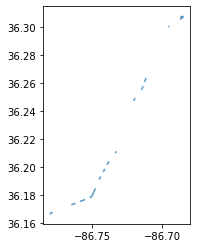

In [74]:
clean_geo_r56_evening_apr_out.plot()

# MAY EVENING OUBOUND

In [75]:
params_May_Evening_out = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates' : '05-30-2022',
}
params_geo_May_Evening_out  = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',

SyntaxError: unexpected EOF while parsing (827431559.py, line 20)

In [ ]:
r56_evening_may_out=concat_frames_columns(requests.get(URL, params = params_geo_May_Evening_out, headers = headers), 
                              requests.get(URL, params = params_May_Evening_out, headers = headers), '03/25/22-04/24/22',
                              '14:30-18:00','m_f','Inbound')
r56_evening_may_out.head(2)

In [ ]:
seg_filter_r56_evening_may_out=r56_evening_may_out[r56_evening_may_out['countForSegment'] > r56_evening_may_out['countForSegment'].max()/2]
seg_filter_r56_evening_may_out.head(2)

In [ ]:
clean_geo_r56_evening_may_out=seg_filter_r56_evening_may_out[seg_filter_r56_evening_may_out['percent20Secs']>=np.percentile(seg_filter_r56_evening_may_out['percent20Secs'], 80)]
clean_geo_r56_evening_may_out.head(2)

In [ ]:
clean_geo_r56_evening_may_out.sort_values(by=('percent20Secs'), ascending=False).head()

In [ ]:
clean_geo_r56_evening_may_out.describe()

In [ ]:
clean_geo_r56_evening_may_out.plot()

# EARLY AM INBOUND

In [ ]:
# EARLY AM INBOUND-------------------
params_April_EarlyAM_In = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
}
params_geo_April_EarlyAM_In  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',

In [ ]:
r56_earlyam_april_in=concat_frames_columns(requests.get(URL, params = params_geo_April_EarlyAM_In, headers = headers), 
                              requests.get(URL, params = params_April_EarlyAM_In, headers = headers), '03/25/22-04/24/22',
                              '00:00-06:00','m_f','Inbound')
r56_earlyam_april_in.head(2)

In [ ]:
seg_filter_r56_earlyam_april_in=r56_earlyam_april_in[r56_earlyam_april_in['countForSegment'] > r56_earlyam_april_in['countForSegment'].max()/2]
seg_filter_r56_earlyam_april_in.head(2)

In [ ]:
clean_geo_r56_earlyam_april_in=seg_filter_r56_earlyam_april_in[seg_filter_r56_earlyam_april_in['percent20Secs']>=np.percentile(seg_filter_r56_earlyam_april_in['percent20Secs'], 80)]
clean_geo_r56_earlyam_april_in.head(2)

In [ ]:
clean_geo_r56_earlyam_april_in.sort_values(by=('percent20Secs'), ascending=False).head()

In [ ]:
clean_geo_r56_earlyam_april_in.describe()

In [ ]:
clean_geo_r56_earlyam_april_in.plot()

# MAY EARLY AM INBOUND

In [ ]:
params_May_EarlyAM_In = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_EarlyAM_In  = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
}


In [ ]:
r56_earlyam_may_in=concat_frames_columns(requests.get(URL, params = params_geo_May_EarlyAM_In, headers = headers), 
                              requests.get(URL, params = params_May_EarlyAM_In, headers = headers), '04/25/22-05/24/22',
                              '00:00-06:00','m_f','Inbound')
r56_earlyam_may_in.head(2)

In [ ]:
seg_filter_r56_earlyam_may_in=r56_earlyam_may_in[r56_earlyam_may_in['countForSegment'] > r56_earlyam_may_in['countForSegment'].max()/2]
seg_filter_r56_earlyam_may_in.head(2)

In [ ]:
clean_geo_r56_earlyam_may_in=seg_filter_r56_earlyam_may_in[seg_filter_r56_earlyam_may_in['percent20Secs']>=np.percentile(seg_filter_r56_earlyam_may_in['percent20Secs'], 80)]
clean_geo_r56_earlyam_may_in.head(2)

In [ ]:
clean_geo_r56_earlyam_may_in.sort_values(by=('percent20Secs'), ascending=False).head()

In [ ]:
clean_geo_r56_earlyam_may_in.describe()

In [ ]:
clean_geo_r56_earlyam_may_in.plot()

# APRIL EARLY AM OUTBOUND

In [ ]:
#EARLY AM OUTBOUND
params_April_EarlyAM_out = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
}
params_geo_April_EarlyAM_out  = {
    'direction': '0',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',

In [ ]:
r56_earlyam_apr_out=concat_frames_columns(requests.get(URL, params = params_geo_April_EarlyAM_out, headers = headers), 
                              requests.get(URL, params = params_April_EarlyAM_out, headers = headers), '03/25/22-04/24/22',
                              '00:00-06:00','m_f','Inbound')
r56_earlyam_apr_out.head(2)

In [ ]:
seg_filter_r56_earlyam_apr_out=r56_earlyam_apr_out[r56_earlyam_apr_out['countForSegment'] > r56_earlyam_apr_out['countForSegment'].max()/2]
seg_filter_r56_earlyam_apr_out.head(2)

In [ ]:
clean_geo_r56_earlyam_apr_out=seg_filter_r56_earlyam_apr_out[seg_filter_r56_earlyam_apr_out['percent20Secs']>=np.percentile(seg_filter_r56_earlyam_apr_out['percent20Secs'], 80)]
clean_geo_r56_earlyam_apr_out.head(2)


In [ ]:
clean_geo_r56_earlyam_apr_out.sort_values(by=('percent20Secs'), ascending=False).head()

In [ ]:
clean_geo_r56_earlyam_apr_out.describe()

In [ ]:
clean_geo_r56_earlyam_apr_out.plot()

# MAY EARLY AM OUTBOUND

In [ ]:

}
params_May_EarlyAM_out = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_EarlyAM_out  = {
    'direction': '0',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022'

In [ ]:
r56_earlyam_may_out=concat_frames_columns(requests.get(URL, params = params_geo_May_EarlyAM_out, headers = headers), 
                              requests.get(URL, params = params_May_EarlyAM_out, headers = headers), '04/25/22-05/24/22',
                              '00:00-06:00','m_f','Outbound')
r56_earlyam_may_out.head(2)

In [ ]:
seg_filter_r56_earlyam_may_out=r56_earlyam_may_out[r56_earlyam_may_out['countForSegment'] > r56_earlyam_may_out['countForSegment'].max()/2]
seg_filter_r56_earlyam_may_out.head(2)

In [ ]:
clean_geo_r56_earlyam_may_out=seg_filter_r56_earlyam_may_out[seg_filter_r56_earlyam_may_out['percent20Secs']>=np.percentile(seg_filter_r56_earlyam_may_out['percent20Secs'], 80)]
clean_geo_r56_earlyam_may_out.head(2)

In [ ]:
clean_geo_r56_earlyam_may_out.sort_values(by=('percent20Secs'), ascending=False).head()

In [ ]:
clean_geo_r56_earlyam_may_out.describe()

In [ ]:
clean_geo_r56_earlyam_may_out.plot()

In [ ]:
r56_pmpeak=concat_frames_columns(requests.get(URL, params = params_geo_April_PMPeak, headers = headers), 
                              requests.get(URL, params = params_April_PMPeak, headers = headers), '03/25/22-04/24/22',
                              '14:30-18:00','m_f','Inbound')
r56_pmpeak.head(2)

seg_filter_r56_pmpeak=r56_pmpeak[r56_pmpeak['countForSegment'] > r56_pmpeak['countForSegment'].max()/2]
seg_filter_r56_pmpeak.head(2)

clean_geo_r56_pmpeak=seg_filter_r56_pmpeak[seg_filter_r56_pmpeak['percent20Secs']>=np.percentile(seg_filter_r56_pmpeak['percent20Secs'], 80)]
clean_geo_r56_pmpeak.head(2)

.sort_values(by=('percent20Secs'), ascending=False).head()

clean_geo_r56_pmpeak.describe()

clean_geo_r56_pmpeak.plot()